# 2. Image Data Wrangling

In order to use images as input for CNNs we need to get them in the right shape

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

### Load and display Images

In [2]:
img = plt.imread("images/meme.jpeg")

Shape >>> (571, 700, 3)


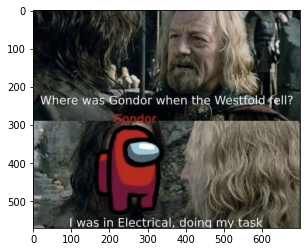

In [3]:
print("Shape >>>", img.shape)
plt.imshow(img)
plt.show()

In [4]:
img

array([[[  8,   6,   7],
        [ 25,  23,  24],
        [ 26,  25,  23],
        ...,
        [ 16,  23,  29],
        [ 16,  23,  29],
        [ 16,  23,  29]],

       [[  8,   6,   7],
        [ 25,  23,  24],
        [ 25,  24,  22],
        ...,
        [ 14,  21,  27],
        [ 14,  21,  27],
        [ 14,  21,  27]],

       [[  8,   6,   7],
        [ 25,  23,  24],
        [ 25,  24,  22],
        ...,
        [ 13,  20,  26],
        [ 13,  20,  26],
        [ 13,  20,  26]],

       ...,

       [[ 38,  38,  38],
        [136, 136, 136],
        [122, 122, 122],
        ...,
        [ 93,  89,  77],
        [ 70,  66,  54],
        [ 42,  38,  26]],

       [[ 39,  39,  39],
        [137, 137, 137],
        [122, 122, 122],
        ...,
        [ 94,  90,  78],
        [ 71,  67,  55],
        [ 43,  39,  27]],

       [[ 41,  39,  40],
        [139, 137, 138],
        [125, 123, 124],
        ...,
        [ 95,  91,  79],
        [ 72,  68,  56],
        [ 44,  40,  28]]

## Cifar-10 Dataset

Good Image Classification Dataset:

- 60000 Images

- 10 Classes

- 32x32 RGB Images (very small-> fast training)

[source](https://www.cs.toronto.edu/~kriz/cifar.html)

In [5]:
DATA_PATH = "./cifar-10-batches-py/data_batch_1"
with open(DATA_PATH, 'rb') as fo:
    data_dict = pickle.load(fo, encoding='bytes')

data_dict.keys()

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])

In [6]:
print("Type >>>", type(data_dict[b'data']))
print("Shape >>>", data_dict[b'data'].shape)

Type >>> <class 'numpy.ndarray'>
Shape >>> (10000, 3072)


In [7]:
data_dict[b'data'] = data_dict[b'data'].reshape(10000, 3, 32, 32)
data_dict[b'data'] = data_dict[b'data'].transpose(0, 2,3,1)

In [8]:
image = data_dict[b"data"][0]

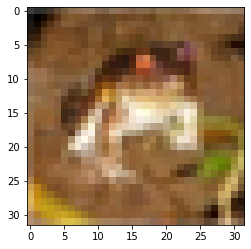

In [9]:
plt.imshow(image)
plt.show()

## Lets use a library to load the dataset

Implemented this "library" in a university course

In [10]:
from dlvc.datasets.cifar import Cifar10
from dlvc.dataset import Subset


train_data = Cifar10("./cifar-10-batches-py/", Subset.TRAINING)
print(train_data.data.shape)

(40000, 32, 32, 3)


Label >>> 6
Data Shape >>> (32, 32, 3)


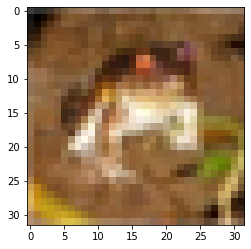

In [11]:
image = train_data.__getitem__(0)

print("Label >>> {}".format(image.label))

print("Data Shape >>> {}".format(image.data.shape))

plt.imshow(image.data)
plt.show()

### Image Augmentation

Use Image Augmentation to increase training sample size!

#### Examples of Augmentation ?

![think](images/think.gif)


- Flip Image

- Crop Image

- Rotation

- Add Random Noise

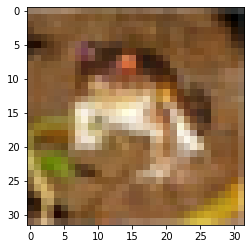

In [12]:
def hflip(sample:np.ndarray) -> np.ndarray:
    '''
    Flip arrays with shape HWC horizontally with a probability of 0.5.
    '''
    return np.flip(sample, axis=1)

plt.imshow(hflip(image.data))
plt.show()

## Mini Batches

In order to train our model we need to generate minibatches of our training data.

This minibatches are again numpy arrays with a shape of (miniBatchSize, Channels, Height, Width).

So if we want a Mini Batch Size of 50 we have a numpy array with shape (50, 3, 35, 35)

#### Why did we put the channels now in the second position not in the last like before? Any ideas?

In [13]:
# Use our library
from dlvc.batches import BatchGenerator
import dlvc.ops as ops

In [14]:
op = ops.chain([
    ops.type_cast(np.float32),
    ops.add(-127.5),
    ops.mul(1 / 127.5),
    ops.hwc2chw()
])

ops_rev = ops.chain([
    ops.chw2hwc(),
    ops.mul(127.5),
    ops.add(127.5),
    ops.type_cast(np.int64)
])

train_batches = BatchGenerator(dataset=train_data, num=50, shuffle=False, op=op)


In [15]:

for mini_batch in train_batches:
    data = mini_batch.data
    labels = mini_batch.label
    print(data.shape)
    print(data[0].shape)
    batch_image_1 = data[0]
    batch_label_1 = labels[0]
    break

(50, 3, 32, 32)
(3, 32, 32)


Label >>> 6


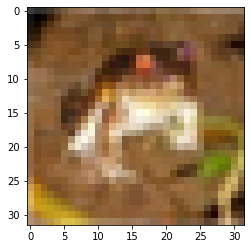

In [16]:
print("Label >>>", batch_label_1)

image_original = ops_rev(batch_image_1)
plt.imshow(image_original)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


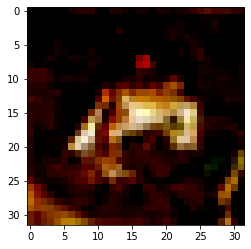

In [17]:
image_scaled = ops.chw2hwc()(batch_image_1)
plt.imshow(image_scaled)